In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,NaN,NaN,115.0,NaN,0,2.0,NaN,NaN,NaN,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,NaN,0,2.0,NaN,0.0,NaN,NaN,NaN,NaN
268,NaN,NaN,4.0,140.0,192.0,0,0.0,148.0,NaN,NaN,NaN,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	72
float64		column 2	28
float64		column 3	44
float64		column 4	28
float64		column 5	28
int64		column 6	0
float64		column 7	14
float64		column 8	100
float64		column 9	56
float64		column 10	86
float64		column 11	100
float64		column 12	56
float64		column 13	72


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,198.000000,242.000000,226.000000,242.000000,242.000000,270.000000,256.000000,170.000000,214.000000,184.000000,170.000000,214.000000,198.000000
mean,0.707071,54.392562,3.194690,131.661157,247.107438,0.148148,1.015625,149.035294,0.313084,1.058152,1.605882,0.686916,4.747475
std,0.456260,9.189049,0.946182,17.485289,47.206670,0.355906,0.997914,23.483318,0.464836,1.159253,0.618234,0.959321,1.950366
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.250000,3.000000,120.000000,212.000000,0.000000,0.000000,131.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,54.500000,3.000000,130.000000,244.500000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,274.750000,0.000000,2.000000,165.750000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

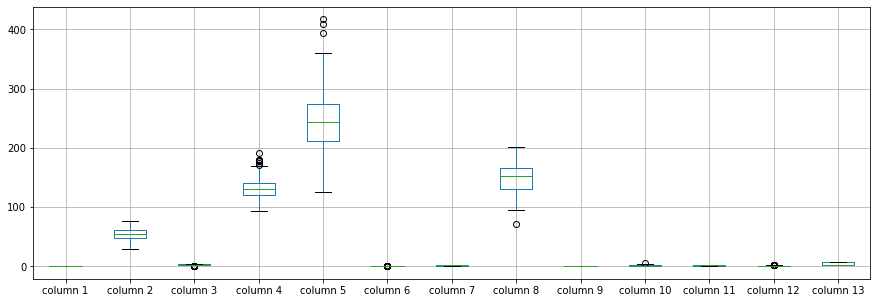

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.707071
column 2      54.392562
column 3       3.194690
column 4     131.661157
column 5     247.107438
column 6       0.148148
column 7       1.015625
column 8     149.035294
column 9       0.313084
column 10      1.058152
column 11      1.605882
column 12      0.686916
column 13      4.747475
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.094433,0.019191,-0.058741,-0.178073,0.094073,0.065412,-0.033950,0.205202,0.140749,0.098775,0.139337,0.357799
column 2,-0.094433,1.000000,0.063498,0.263932,0.185126,0.120764,0.122207,-0.424652,0.086915,0.192616,0.172901,0.358166,0.113875
column 3,0.019191,0.063498,1.000000,-0.092914,0.094242,-0.054976,0.092438,-0.284829,0.349679,0.194756,0.117735,0.191426,0.223195
column 4,-0.058741,0.263932,-0.092914,1.000000,0.148696,0.128670,0.096969,0.043896,0.043098,0.138358,0.057901,0.052473,0.116006
column 5,-0.178073,0.185126,0.094242,0.148696,1.000000,0.036514,0.124544,-0.054780,0.084188,-0.072826,-0.062657,0.124446,0.012598
column 6,0.094073,0.120764,-0.054976,0.128670,0.036514,1.000000,0.037576,0.044122,-0.031778,-0.013898,0.057605,0.112640,-0.012312
column 7,0.065412,0.122207,0.092438,0.096969,0.124544,0.037576,1.000000,-0.148721,0.086488,0.163949,0.162497,0.109177,-0.015721
column 8,-0.033950,-0.424652,-0.284829,0.043896,-0.054780,0.044122,-0.148721,1.000000,-0.379817,-0.325704,-0.386767,-0.201215,-0.189263
column 9,0.205202,0.086915,0.349679,0.043098,0.084188,-0.031778,0.086488,-0.379817,1.000000,0.260192,0.296694,0.135887,0.297245
column 10,0.140749,0.192616,0.194756,0.138358,-0.072826,-0.013898,0.163949,-0.325704,0.260192,1.000000,0.568413,0.241255,0.288527


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+56,13+56+56,13+56+56+56,13+56+56+56+56,13+56+56+56+56+56,13+56+56+56+56,13+56+56+56,13+56+56,13+56,13], vae_layer = False, seed = 56)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 502.6816940307617
Epoch: 1 , loss: 500.292293548584
Epoch: 2 , loss: 501.12401008605957
Epoch: 3 , loss: 503.05661392211914
Epoch: 4 , loss: 500.8961124420166
Epoch: 5 , loss: 500.61178398132324
Epoch: 6 , loss: 500.39967346191406
Epoch: 7 , loss: 500.5876178741455
Epoch: 8 , loss: 496.0008964538574
Epoch: 9 , loss: 502.22508239746094
Epoch: 10 , loss: 500.31672286987305
Epoch: 11 , loss: 498.79382705688477
Epoch: 12 , loss: 495.4429874420166
Epoch: 13 , loss: 503.48354148864746
Epoch: 14 , loss: 502.27873039245605
Epoch: 15 , loss: 500.19330978393555
Epoch: 16 , loss: 497.0992488861084
Epoch: 17 , loss: 498.7147388458252
Epoch: 18 , loss: 499.1496124267578
Epoch: 19 , loss: 501.5776252746582
Epoch: 20 , loss: 498.17342376708984
Epoch: 21 , loss: 500.00951194763184
Epoch: 22 , loss: 497.87340354919434
Epoch: 23 , loss: 495.8816146850586
Epoch: 24 , loss: 492.13040924072266
Epoch: 25 , loss: 489.8979778

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.425863
column 2      48.000000
column 3       2.455334
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8      94.855598
column 9       0.000000
column 10      0.808568
column 11      1.661211
column 12      0.000000
column 13      2.847615
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,-19.949535,0.263829,0.0,-366.400269,0,0.0,-35.958351,0.460224,-0.604199,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,0.000000,0.000000,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,0.000000,0.000000,0.000000,0.0,-211.078644,0,0.0,-95.062649,0.000000,-0.761819,-0.970098,0.565608,-1.094717
268,-0.317432,4.569592,0.000000,0.0,0.000000,0,0.0,0.000000,0.570943,1.570837,0.589567,0.000000,-1.260726


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1242.787979938447, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.22951889392098831

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4      42.220207
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8      52.993477
column 9       0.112063
column 10      0.000000
column 11      0.796006
column 12      0.249613
column 13      1.651242
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.000000,4.000000,130.0,322.000000,0,2.0,109.000000,0.000000,2.400000,2.000000,3.000000,3.000000
1,0.000000,47.050465,3.263829,115.0,197.599731,0,2.0,124.041649,0.460224,0.995801,2.000000,0.000000,7.000000
2,1.000000,57.000000,2.000000,124.0,261.000000,0,0.0,141.000000,0.000000,0.300000,1.000000,0.000000,7.000000
3,1.000000,64.000000,4.000000,128.0,263.000000,0,0.0,105.000000,1.000000,0.200000,2.000000,1.000000,7.000000
4,0.000000,74.000000,2.000000,120.0,269.000000,0,2.0,121.000000,1.000000,0.200000,1.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,3.000000,172.0,199.000000,1,0.0,162.000000,0.000000,0.500000,1.000000,0.000000,7.000000
266,1.000000,44.000000,2.000000,120.0,263.000000,0,0.0,173.000000,0.000000,0.000000,1.000000,0.000000,7.000000
267,0.000000,56.000000,2.000000,140.0,82.921356,0,2.0,57.937351,0.000000,0.538181,1.029902,0.565608,1.905283
268,0.682568,61.569592,4.000000,140.0,192.000000,0,0.0,148.000000,0.570943,1.970837,2.589567,0.000000,4.739274


In [20]:
imputations[-1].to_excel("Sheart_AG_20(imp).xlsx", index=False, header=False)